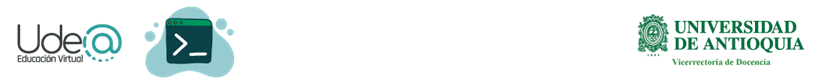

# Miniproyecto 1

**Estudiantes:**
*   Sebastian Orozco Blandon.
*   Maria Lucia Orozco Guerra

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

In [ ]:
# Descargamos el archivo Emocional

#https://drive.google.com/file/d/1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3/view?usp=sharing   P1
#https://drive.google.com/file/d/1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22/view?usp=drive_link  P2
#https://drive.google.com/file/d/1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD/view?usp=drive_link  P3
#https://drive.google.com/file/d/1cNMil1P60z-XrqExnnKvmggmXWhI3glZ/view?usp=drive_link  P4
!gdown '1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3'
!gdown '1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22'
!gdown '1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD'
!gdown '1cNMil1P60z-XrqExnnKvmggmXWhI3glZ'

Downloading...
From: https://drive.google.com/uc?id=1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3
To: /content/s17.mat
100% 80.7M/80.7M [00:01<00:00, 44.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22
To: /content/s16.mat
100% 80.8M/80.8M [00:04<00:00, 17.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD
To: /content/s15.mat
100% 80.7M/80.7M [00:02<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cNMil1P60z-XrqExnnKvmggmXWhI3glZ
To: /content/s14.mat
100% 80.6M/80.6M [00:03<00:00, 23.9MB/s]


In [ ]:
# Cargar el archivo .mat
from PIL import Image
from IPython.display import display
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, lfilter, freqz, stft, find_peaks, filtfilt
import pandas as pd
from scipy import signal
from scipy.stats import skew

#se pretende construir una matriz de 160xD   (D = 63)

In [ ]:
datosP1 = sc.loadmat('s17.mat')  #datos de la persona 1 (primeros 40 videos)
datosP2 = sc.loadmat('s16.mat')  #datos de la persona 2 (siguientes 40 videos)
datosP3 = sc.loadmat('s15.mat')  #datos de la persona 3 (siguientes 40 videos)
datosP4 = sc.loadmat('s14.mat')  #datos de la persona 4 (ultimos 40 videos)

## Señales Fisiológicas periféricas

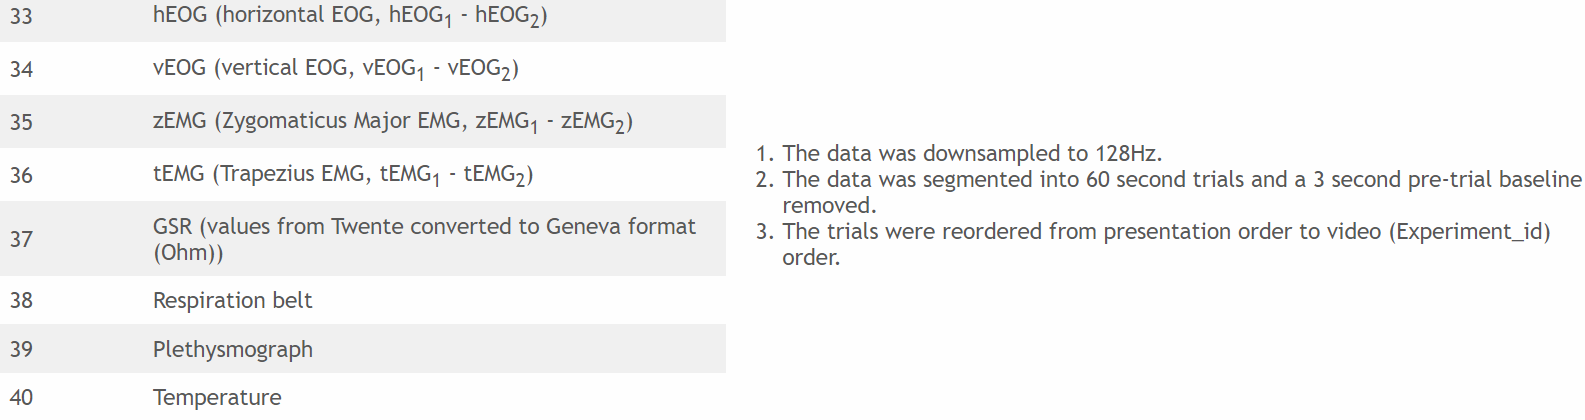

de la 1 a la 32 son las señales EEG

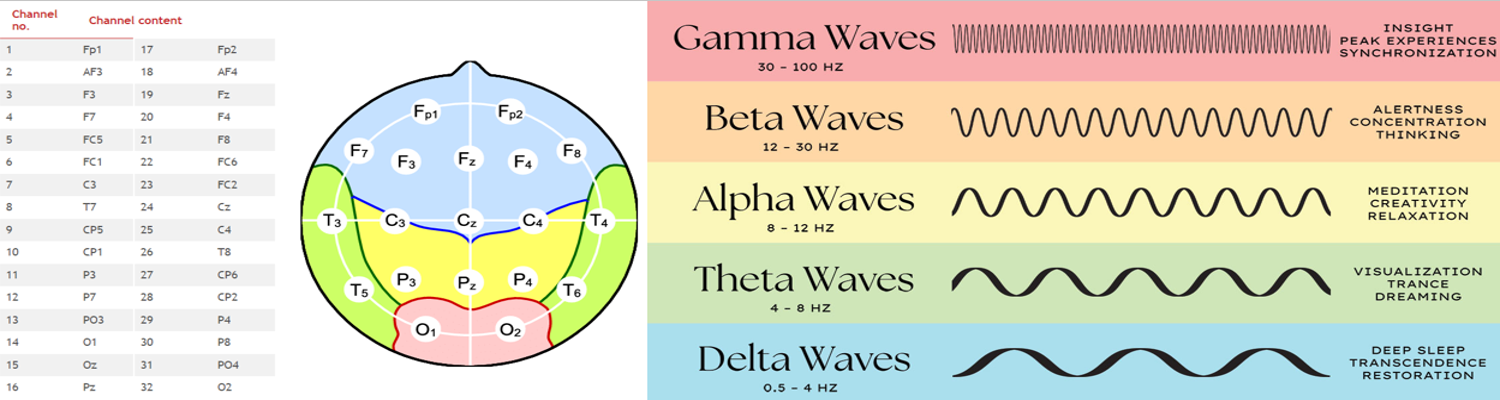

In [ ]:
file_id = '1coNmGf955GB72mlx7yAOZ6jPYf_ozk77'
imagen = 'eeg.png'
!gdown -q https://drive.google.com/uc?id={file_id} -O {imagen}

display(Image.open('eeg.png').resize((1500, 400)))

## Espacios Arousal - Valence


- **Excitación (arousal)**: El nivel de activación fisiológica o excitación experimentado en respuesta a un estímulo, que va desde bajo (tranquilo) hasta alto (intenso).

- **Valencia (valence)**: La cualidad emocional o positividad/negatividad de la experiencia subjetiva de un individuo, que va desde negativa (desagradable) hasta positiva (agradable).

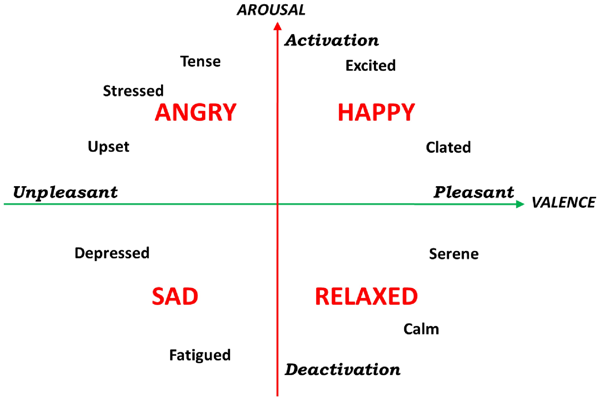

In [ ]:
file_id = '1Qu0dXLCbg6s6HbrOY1xTvyLtkZAXZZUq'
diagrama = 'diagrama.png'
!gdown -q https://drive.google.com/uc?id={file_id} -O {diagrama}

display(Image.open('diagrama.png').resize((600, 400)))

In [ ]:
signals1 = datosP1['data']
etiquetas1 = datosP1['labels']   # contiene el arousal y la valencia pra determinar 3 estados de animo (positivo, negativo y neutro)
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints
# fs que funciona 108.8 (vector temporal) t=np.arange(0, 60, 1.0/108.8)
signals2 = datosP2['data']
etiquetas2 = datosP2['labels']
signals3 = datosP3['data']
etiquetas3 = datosP3['labels']
signals4 = datosP4['data']
etiquetas4 = datosP4['labels']

In [ ]:
# Esto solo es un ejemplo para visualizacion del comportamiento de una de las tantas señales biologicas de la base de datos
GSR = signals1[0,36,:]  # 0 --> primer video,  36 --> id de la señal  (37-1),  : --> todas las muestras de la señal
BloodVolume = signals1[0,38,:]  # 0 --> primer video,  38 --> id de la señal  (39-1),  : --> todas las muestras de la señal
respiration = signals1[0,37,:]   # 0 --> primer video,  37 --> id de la señal  (38-1),  : --> todas las muestras de la señal
Temp = signals1[0,39,:]     # 0 --> primer video,  39 --> id de la señal  (40-1),  : --> todas las muestras de la señal
vEOG = signals1[0,33,:]    # 0 --> primer video,  33 --> id de la señal  (34-1),  : --> todas las muestras de la señal
EEG_Fp1 = signals1[0,0,:]    # 0 --> primer video,  0 --> id de la señal  (1-1),  : --> todas las muestras de la señal

In [ ]:
def normalizar(vector):

  z = np.zeros(len(vector))  # se define el vector normalizado de igual longitud que el original
  min_x = min(vector)      # se halla el minimo valor de los datos originales
  max_x = max(vector)      # se halla el maximo valor de los datos originales
  for i in range(len(vector)):
    z[i] = (vector[i]-min_x)/(max_x-min_x)   # se calcula la ecuacion (1) para todos los datos del arreglo

  return z

In [ ]:
#Se normalizan todos los vectores
GSRn = normalizar(GSR)
Bloodn = normalizar(BloodVolume)
Resn = normalizar(respiration)
Tempn = normalizar(Temp)
vEOGn = normalizar(vEOG)
EEGn = normalizar(EEG_Fp1)

Text(0.5, 1.0, 'EEG Fp1')

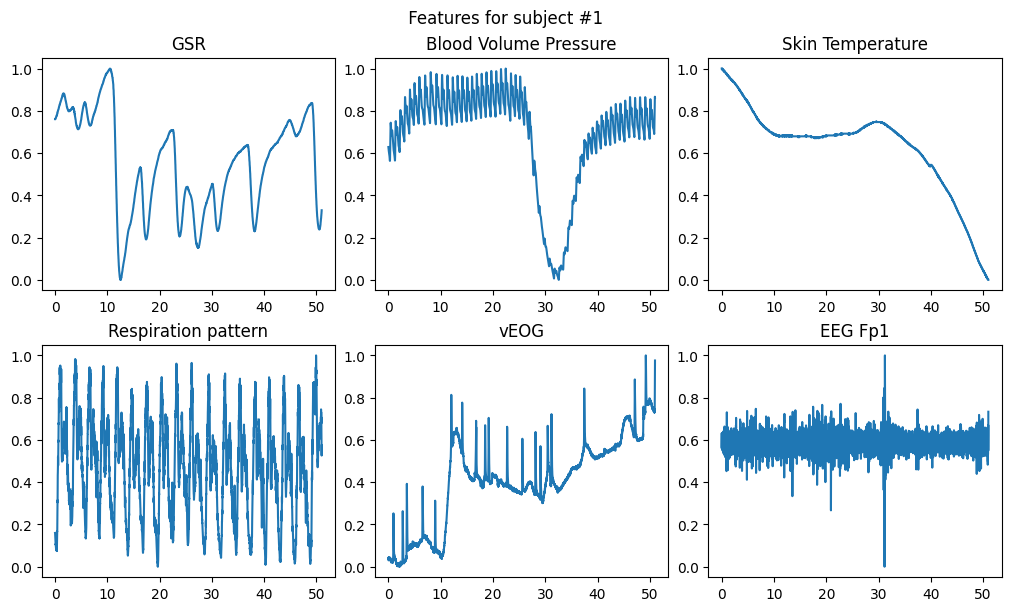

In [ ]:
t = np.arange(0,51,1/128)
fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle(' Features for subject #1 ')
axs[0, 0].plot(t,GSRn)
axs[0, 0].set_title('GSR')
axs[0, 1].plot(t,Bloodn)
axs[0, 1].set_title('Blood Volume Pressure')
axs[0, 2].plot(t,Tempn)
axs[0, 2].set_title('Skin Temperature')
axs[1, 0].plot(t,Resn)
axs[1, 0].set_title('Respiration pattern')
axs[1, 1].plot(t,vEOGn)
axs[1, 1].set_title('vEOG')
axs[1, 2].plot(t,EEGn)
axs[1, 2].set_title('EEG Fp1')

Cada Conjunto de características procesado será un vector de ${\bf{x}}\in\mathbb{R}^{D\times 1}$

Lo que realizaremos es construir una matriz de características ${\bf{X}}\in\mathbb{R}^{N\times D}$ donde ${\bf{X}} = \{{\bf{x}}_n\}_{n=1}^{N}$

Seguidamente se organiza dicha matriz en un dataframe, el cual contiene la info de los 4 pacientes con sus 40 videos analizados.

In [ ]:
def calc_emocion(etiquetas):
  arousal = etiquetas[:,1]
  valence = etiquetas[:,0]
  emocion = np.zeros(np.size(arousal))
  emocion[valence<=4] = 0   # emocion negativa
  emocion[np.logical_and(valence>4 ,valence<=7)] = 1   # emocion neutra
  emocion[valence>7] = 2     # emocion positiva
  return emocion

In [ ]:
emocion1 = calc_emocion(etiquetas1)   # se definen los niveles de emocion del sujeto 1
emocion2 = calc_emocion(etiquetas2)   # se definen los niveles de emocion del sujeto 2
emocion3 = calc_emocion(etiquetas3)   # se definen los niveles de emocion del sujeto 3
emocion4 = calc_emocion(etiquetas4)   # se definen los niveles de emocion del sujeto 4

## Caracteristicas:

Ahora se procede a automatizar los calculos de las siguientes caracteristicas de cada señal biologica para los 40 videos:
1. GSR: average skin resistance, average of derivative, 10 spectral power in the [0-2.4]Hz bands.
2. Blood Volume Pressure: average and standard deviation of HR, HRV, energy ratio between the frequency bands
[0.04-0.15]Hz and [0.15-0.5]Hz, spectral power in the bands ([0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz).
3. Respiration Pattern: average respiration signal, mean of
derivative (variation of the respiration signal), 10 spectral power in
the bands from 0 to 2.4Hz.
4. Skin Temperature: average, average of its derivative, spectral power in the
bands ([0-0.1]Hz, [0.1-0.2]Hz).
5. EOG & EMG: eye blinking rate, mean and variance of the signal.
6. EEG: spectral power asymmetry for 3 different electrodes (Theta waves)

In [ ]:
# Función para diseñar y aplicar un filtro de aproximacion de orden 2  (para bandas muy pequeñas de frecuencia)

def filtrar(senal,fs, fc, tipo_filtro):
  sos = signal.butter(10, fc, tipo_filtro, fs, output='sos')
  filtered = signal.sosfilt(sos, senal)
  return filtered

# Función para diseñar y aplicar un filtro Butter
def aplicar_filtro(data,fs, fc, tipo_filtro):
    frecuencia_nyquist = 0.5 *fs
    frecuencia_normalizada = fc / frecuencia_nyquist
    b, a = butter(6, frecuencia_normalizada, btype=tipo_filtro, analog=False)
    data_filtrada = lfilter(b, a, data)

    return data_filtrada

In [ ]:
def top_n_spectral_powers(signal, sampling_rate, n=10):
    # Calcula la transformada rápida de Fourier
    fft_values = np.fft.rfft(signal)

    # Calcula la potencia espectral
    spectral_power = np.abs(fft_values)**2

    # Obtiene los índices de las n potencias más altas
    top_indices = np.argsort(spectral_power)[-n:]

    # Obtiene las frecuencias correspondientes a esos índices
    top_frequencies = np.fft.rfftfreq(len(signal), 1/sampling_rate)[top_indices]

    # Obtiene las potencias correspondientes
    top_powers = spectral_power[top_indices]

    return top_frequencies, top_powers


def energy(signal, sampling_rate, band):
    # Transformada rápida de Fourier
    fft_values = np.fft.rfft(signal)

    # Potencia espectral
    spectral_power = np.abs(fft_values)**2

    # Frecuencias de la señal
    frequencies = np.fft.rfftfreq(len(signal), 1/sampling_rate)

    # Energía en la banda 1
    energy_band = np.sum(spectral_power[(frequencies >= band1[0]) & (frequencies <= band1[1])])

    return energy_band


def spectral_power_in_band(signal, sampling_rate, frequency_band):
    # Transformada rápida de Fourier
    fft_values = np.fft.rfft(signal)

    # Potencia espectral
    spectral_power = np.abs(fft_values)**2

    # Frecuencias de la señal
    frequencies = np.fft.rfftfreq(len(signal), 1/sampling_rate)

    # Energía en la banda de frecuencia
    power_in_band = np.sum(spectral_power[(frequencies >= frequency_band[0]) & (frequencies <= frequency_band[1])])

    return power_in_band

In [ ]:
#Funcion para filtrar las señales EEG segun su tipo
def get_brain_waves(sig, wave_type, cutoff_frequency, fs, filter_order=10):

    if wave_type == "delta":
      filter_type = "lowpass"

    elif wave_type == "gamma":
      filter_type = "highpass"

    else:
      filter_type = "bandpass"

    sos = signal.butter(filter_order, cutoff_frequency, filter_type, fs=fs, output='sos')
    filtered_signal = signal.sosfilt(sos, sig)
    return filtered_signal/max(abs(filtered_signal))

#Funcion para sacar las caracteristicas de la señal EEG filtrada (asimetria de la densidad espectral de potencia )
def eeg_features(signals, video_number,electrodes_index,  wave_type, cutoff_frequency, fs):
  features = []

  signals_to_process = [np.squeeze(signals[video_number, index,:]) for index in electrodes_index]

  filtered_signals = [get_brain_waves(sig,wave_type,cutoff_frequency, fs) for sig in signals_to_process]

  # Power Spectral Density
  power_spectral_densities = []
  for filtered_signal in filtered_signals:
    f, power_spectral_density = signal.welch(filtered_signal, fs, nperseg=1024)
    power_spectral_densities.append(power_spectral_density)

  # Asymmetry
  asymmetries = [skew(power_spectral_density) for power_spectral_density in power_spectral_densities]

  # store features
  features.append(asymmetries)

  return features

In [ ]:
fs = 128
x=np.zeros((160, 63))   # Matriz X 160x63
for m in range(0,4):   # contador para extraer los 4 sujetos
  for k in range(0,40):   # contador para recorrer los 40 videos de cada sujeto
    if m == 0:
      GSR = signals1[k,36,:]
      BloodVolume = signals1[k,38,:]
      respiration = signals1[k,37,:]
      Temp = signals1[k,39,:]
      vEOG = signals1[k,33,:]
      emocion = calc_emocion(etiquetas1)
    elif m == 1:
      GSR = signals2[k,36,:]
      BloodVolume = signals2[k,38,:]
      respiration = signals2[k,37,:]
      Temp = signals2[k,39,:]
      vEOG = signals2[k,33,:]
      emocion = calc_emocion(etiquetas2)
    elif m == 2:
      GSR = signals3[k,36,:]
      BloodVolume = signals3[k,38,:]
      respiration = signals3[k,37,:]
      Temp = signals3[k,39,:]
      vEOG = signals3[k,33,:]
      emocion = calc_emocion(etiquetas3)
    elif m == 3:
      GSR = signals4[k,36,:]
      BloodVolume = signals4[k,38,:]
      respiration = signals4[k,37,:]
      Temp = signals4[k,39,:]
      vEOG = signals4[k,33,:]
      emocion = calc_emocion(etiquetas4)
    GSRn = normalizar(GSR)
    Bloodn = normalizar(BloodVolume)
    Resn = normalizar(respiration)
    Tempn = normalizar(Temp)
    vEOGn = normalizar(vEOG)
    EEGn = normalizar(EEG_Fp1)

    # Señales para la GSR
    xGSR=[]   # Super vector con todas las caracteristicas de la señal GSR
    xGSR.append(GSRn.mean())    # media de la señal GSR
    xGSR.append(np.diff(GSRn).mean())    # media de la derivada de la señal
    fc = 2.4
    pasa_baja_gsr = aplicar_filtro(GSRn,fs, fc, 'low')
    top_frequenciesGSR, top_powersGSR = top_n_spectral_powers(pasa_baja_gsr, 128)   # se hallan las 10 potencias mas altas con su respectiva frecuencia
    for i in range(len(top_frequenciesGSR)):
      xGSR.append(top_powersGSR[i])
    for i in range(len(top_frequenciesGSR)):
      xGSR.append(top_frequenciesGSR[i])
    #print(xGSR)  # x = [media, media_derivada, 10° potencia, 9° potencia, ... , 2° potencia, 1° potencia, 10° frec, 9° frec, ... , 2° frec, 1° frec]  22 elementos

    for i in range(len(xGSR)): x[k+40*m][i]=xGSR[i]

    #----------------------------------------------------------------------------------------------------------------------------------#
    # Señales para la Pletismografia
    xBlood=[]   # Super vector con todas las caracteristicas de la señal pletismografia
    HR=np.zeros(6)
    HRV=[]
    t = np.arange(0,len(Bloodn))
    for i in range(0,5):
      peaks, _ = find_peaks(Bloodn[i*1288:(i+1)*1288], distance=fs//2)   # cantidad de datos = 6528  ---> 51 sec ,    10 sec ---> 1280
      HR[i] = len(peaks)   # Heart rate cada 10 segundos
      distances = np.diff(t[peaks])
      for j in range(len(distances)):
        HRV.append(distances[j]*(60/len(Bloodn)))  # se transforman las distancias de muestras a tiempo en sec

    xBlood.append(HR.mean())   # media de la heart rate en los 6 intervalos de 10 segundos (heart rate casa 10 segundos)
    xBlood.append(HR.std())
    xBlood.append(np.array(HRV).mean())   # media de la heart rate variability entre todos los intervalos de picos consecutivos
    xBlood.append(np.array(HRV).std())
    band1 = (0.04, 0.15)
    pasa_banda_blood1 = filtrar(Bloodn,fs, band1, 'bandpass')
    energia_blood1 = energy(pasa_banda_blood1, fs, band1)
    band2 = (0.15, 0.5)
    pasa_banda_blood2 = filtrar(Bloodn,fs, band2, 'bandpass')
    energia_blood2 = energy(pasa_banda_blood2, fs, band2)
    ratio =  energia_blood1/energia_blood2  # radio de energia entre la banda (0.04, 0.15)Hz y la banda (0.15, 0.5)Hz
    xBlood.append(ratio)
    band3 = (0.1, 0.2)
    band4 = (0.2, 0.3)
    band5 = (0.3, 0.4)
    pasa_banda_blood3 = filtrar(Bloodn,fs, band3, 'bandpass')
    pasa_banda_blood4 = filtrar(Bloodn,fs, band4, 'bandpass')
    pasa_banda_blood5 = filtrar(Bloodn,fs, band5, 'bandpass')
    power3 = spectral_power_in_band(pasa_banda_blood3, fs, band3)
    power4 = spectral_power_in_band(pasa_banda_blood4, fs, band4)
    power5 = spectral_power_in_band(pasa_banda_blood5, fs, band5)
    xBlood.append(power3)
    xBlood.append(power4)
    xBlood.append(power5)
    #print(xBlood)  # x = [media_HR, desviacion_HR, media_HRV, desviacion_HRV, radio_energia, potencia_banda(0.1,0.2), potencia_banda(0.2,0.3), potencia_banda(0.3,0.4)]  8 elementos

    for i in range(len(xBlood)): x[k+40*m][i+len(xGSR)]=xBlood[i]

    #----------------------------------------------------------------------------------------------------------------------------------#
    # Señales para la Respiracion:
    xRes=[]   # Super vector con todas las caracteristicas de la señal de respiracion
    xRes.append(Resn.mean())    # media de la señal de respiracion
    xRes.append(np.diff(Resn).mean())  # media de la derivada de la señal
    fc = 2.4
    pasa_baja_res = aplicar_filtro(Resn,fs, fc, 'low')
    top_frequenciesRes, top_powersRes = top_n_spectral_powers(pasa_baja_res, fs)  # se hallan las 10 potencias mas altas con su respectiva frecuencia
    for i in range(len(top_frequenciesRes)):
      xRes.append(top_powersRes[i])
    for i in range(len(top_frequenciesRes)):
      xRes.append(top_frequenciesRes[i])
    #print(xRes)   # x = [media, media_derivada, 10° potencia, 9° potencia, ... , 2° potencia, 1° potencia, 10° frec, 9° frec, ... , 2° frec, 1° frec]  22 elementos

    for i in range(len(xRes)): x[k+40*m][i+len(xGSR)+len(xBlood)]=xRes[i]

    #----------------------------------------------------------------------------------------------------------------------------------#
    # Señales para la Temperatura:
    xTemp=[]  # Super vector con todas las caracteristicas de la señal de temperatura
    xTemp.append(Tempn.mean())   # media de la señal de temperatura
    xTemp.append(np.diff(Tempn).mean())   # media de la derivada de la señal
    band1 = (0, 0.1)
    band2 = (0.1, 0.2)
    pasa_bajas_tem1 = filtrar(Tempn,fs, band1[1], 'lowpass')
    pasa_banda_tem2 = filtrar(Tempn,fs, band2, 'bandpass')
    power1 = spectral_power_in_band(pasa_bajas_tem1, fs, band1)
    power2 = spectral_power_in_band(pasa_banda_tem2, fs, band2)
    xTemp.append(power1)
    xTemp.append(power2)
    #print(xTemp)  # x = [media, media_derivada, potencia_banda(0,0.1), potencia_banda(0.1,0.2)]  4 elementos

    for i in range(len(xTemp)): x[k+40*m][i+len(xGSR)+len(xBlood)+len(xRes)]=xTemp[i]

    #----------------------------------------------------------------------------------------------------------------------------------#
    # Señales EOG:
    xEOG=[]   # Super vector con todas las caracteristicas de la señal vEOG
    EB=np.zeros(6)
    t = np.arange(0,len(vEOGn))
    for i in range(0,5):
      peaks, _ = find_peaks(vEOGn[i*1280:(i+1)*1280], prominence=0.1)
      EB[i] = len(peaks)   # Eye blink rate cada 10 segundos

    xEOG.append(EB.mean())   # media de eye blink rate en los 6 intervalos de 10 segundos (heart rate casa 10 segundos)
    xEOG.append(vEOGn.mean())   # media de la señal vEOG
    xEOG.append(vEOGn.var())   # varianza de la señal vEOG
    #print(xEOG)  # x = [media_eyeblink, media_señal, varianza_señal]  3 elementos

    for i in range(len(xEOG)): x[k+40*m][i+len(xGSR)+len(xBlood)+len(xRes)+len(xTemp)]=xEOG[i]

    #----------------------------------------------------------------------------------------------------------------------------------#
    # Señales EEG:
    wave_type = "theta"
    cutoff_frequency = [4,8]
    #video_numbers = np.arange(0,40,1)
    electrodes_index = [0,15, 16] # FP1, PZ, FP2
    if m==0:
      xEEG = eeg_features(signals1,k,electrodes_index,  wave_type, cutoff_frequency, fs)
    elif m==1:
      xEEG = eeg_features(signals2,k,electrodes_index,  wave_type, cutoff_frequency, fs)
    elif m==2:
      xEEG = eeg_features(signals3,k,electrodes_index,  wave_type, cutoff_frequency, fs)
    elif m==3:
      xEEG = eeg_features(signals4,k,electrodes_index,  wave_type, cutoff_frequency, fs)

    for i in range(np.size(xEEG)): x[k+40*m][i+len(xGSR)+len(xBlood)+len(xRes)+len(xTemp)+len(xEOG)] = xEEG[0][i]
    #----------------------------------------------------------------------------------------------------------------------------------#
  for j in range(0,40): x[j+40*m][62]=emocion[j]   # Se agrega al final de cada fila el nivel de emocion registrado para cada video


##DataFrame:

In [ ]:
encabezados=['media GSR','media derivada GSR', '10° potencia GSR','9° potencia GSR', '8° potencia GSR', '7° potencia GSR', '6° potencia GSR', '5° potencia GSR',
              '4° potencia GSR', '3° potencia GSR', '2° potencia GSR', '1° potencia GSR', '10° frec GSR', '9° frec GSR', '8° frec GSR', '7° frec GSR',
             '6° frec GSR', '5° frec GSR', '4° frec GSR', '3° frec GSR', '2° frec GSR', '1° frec GSR', 'media HR', 'desviacion HR', 'media HRV', 'desviacion HRV',
             'radio energia entre B1(0.014, 0.15) y B2(0.15, 0.5) Plet', 'potencia banda(0.1, 0.2) Plet', 'potencia banda(0.2, 0.3) Plet', 'potencia banda(0.3, 0.4) Plet',
             'media Respiracion','media derivada Respiracion', '10° potencia Respiracion','9° potencia Respiracion', '8° potencia Respiracion', '7° potencia Respiracion',
             '6° potencia Respiracion', '5° potencia Respiracion', '4° potencia Respiracion', '3° potencia Respiracion', '2° potencia Respiracion', '1° potencia Respiracion',
               '10° frec Respiracion', '9° frec Respiracion', '8° frec Respiracion', '7° frec Respiracion',
             '6° frec Respiracion', '5° frec Respiracion', '4° frec Respiracion', '3° frec Respiracion', '2° frec Respiracion', '1° frec Respiracion',
             'media Temperatura', 'media derivada Temperatura', 'potencia banda(0, 0.1) Temp', 'potencia banda(0.1, 0.2) Temp', 'media Eye Blink', 'media EOG', 'varianza EOG',
             'asimetria FP1', 'asimetria PZ', 'asimetria FP2','Emocion']

In [ ]:
df = pd.DataFrame(data=x, columns=encabezados)   # Se crea el dataframe con la matriz creada de 160x60
df

media GSR  media derivada GSR  10° potencia GSR  9° potencia GSR  \
0     0.556590           -0.000066      24344.775052     26133.192790   
1     0.625526            0.000068      13676.513589     18482.769890   
2     0.506506            0.000153      21197.876370     21703.654715   
3     0.614848            0.000123       4157.286611      6167.363155   
4     0.551146            0.000126      13713.718888     15032.105054   
..         ...                 ...               ...              ...   
155   0.487843            0.000088       4237.629158     11361.120202   
156   0.587053            0.000073       5440.870536      7243.802475   
157   0.580015            0.000073       3596.098997      6763.358306   
158   0.738285           -0.000128      10125.727213     14636.377163   
159   0.584659           -0.000083       5186.840316      5476.192680   

     8° potencia GSR  7° potencia GSR  6° potencia GSR  5° potencia GSR  \
0       34577.267722     38708.126237     49469.151571     85843.253005   
1       20432.329884     30312.397453     69120.923551    119362.480254   
2       34846.439005     50468.183278     58466.549154     70894.088027   
3       13113.761223     39733.392122     42282.665880     61478.764306   
4       30161.210381     36872.594647     53205.794642     69132.279129   
..               ...              ...              ...              ...   
155     17780.535842     17890.219108     19324.986558     30113.804019   
156     14259.278924     19119.977410     24189.621836     32214.453887   
157      8548.779417      9689.921925     15385.048091     15616.418005   
158     17666.030998     18820.134113     19508.993129    139879.777798   
159      6344.558762     10139.689464     22166.381770     25124.541100   

     4° potencia GSR  3° potencia GSR  ...  media derivada Temperatura  \
0      124975.078820    205735.923710  ...                   -0.000153   
1      123034.847506    233772.412542  ...                    0.000153   
2       79802.428739    223039.314434  ...                    0.000034   
3      106634.477989    180448.369713  ...                    0.000135   
4       71119.143147    125991.108539  ...                   -0.000153   
..               ...              ...  ...                         ...   
155     39361.635426     55232.864695  ...                   -0.000126   
156     35416.692608    216838.295696  ...                    0.000151   
157     37438.024288    147471.233850  ...                   -0.000147   
158    217495.764489    290047.776714  ...                    0.000145   
159     80386.002742    364061.856565  ...                   -0.000119   

     potencia banda(0, 0.1) Temp  potencia banda(0.1, 0.2) Temp  \
0                   4.885401e-14                   1.872567e-16   
1                   3.809888e-14                   1.675041e-16   
2                   1.641342e-14                   1.056677e-17   
3                   4.901566e-14                   1.279617e-16   
4                   3.296869e-14                   1.730588e-16   
..                           ...                            ...   
155                 1.942149e-14                   1.227181e-16   
156                 1.558233e-14                   1.820436e-16   
157                 3.148712e-14                   1.729798e-16   
158                 3.846748e-14                   1.723473e-16   
159                 3.731698e-14                   8.532403e-17   

     media Eye Blink  media EOG  varianza EOG  asimetria FP1  asimetria PZ  \
0           3.333333   0.405822      0.041283       4.597173      5.378679   
1           6.166667   0.337978      0.055085       4.321965      5.334741   
2           6.333333   0.317648      0.041634       4.682640      5.349993   
3           4.000000   0.205971      0.014250       5.269093      5.558745   
4           6.333333   0.203349      0.028691       4.735552      5.062669   
..               ...        ...           ...            ...     

## Pruebas:

In [ ]:
df1 = df.loc[: , ['media GSR','media derivada GSR', '10° potencia GSR','9° potencia GSR', '8° potencia GSR', '7° potencia GSR', '6° potencia GSR', '5° potencia GSR',
              '4° potencia GSR', 'Emocion']]
df2 = df.loc[: , ['3° potencia GSR', '2° potencia GSR', '1° potencia GSR', '10° frec GSR', '9° frec GSR', '8° frec GSR', '7° frec GSR',
             '6° frec GSR', '5° frec GSR', 'Emocion']]
df3 = df.loc[: , ['4° frec GSR', '3° frec GSR', '2° frec GSR', '1° frec GSR', 'media HR', 'desviacion HR', 'media HRV', 'desviacion HRV',
             'radio energia entre B1(0.014, 0.15) y B2(0.15, 0.5) Plet', 'Emocion']]
df4 = df.loc[: , ['potencia banda(0.1, 0.2) Plet', 'potencia banda(0.2, 0.3) Plet', 'potencia banda(0.3, 0.4) Plet',
             'media Respiracion','media derivada Respiracion', '10° potencia Respiracion','9° potencia Respiracion', '8° potencia Respiracion', '7° potencia Respiracion', 'Emocion']]
df5 = df.loc[: , ['6° potencia Respiracion', '5° potencia Respiracion', '4° potencia Respiracion', '3° potencia Respiracion', '2° potencia Respiracion', '1° potencia Respiracion',
               '10° frec Respiracion', '9° frec Respiracion', '8° frec Respiracion', 'Emocion']]
df6 = df.loc[: , ['7° frec Respiracion',
             '6° frec Respiracion', '5° frec Respiracion', '4° frec Respiracion', '3° frec Respiracion', '2° frec Respiracion', '1° frec Respiracion',
             'media Temperatura', 'media derivada Temperatura', 'Emocion']]
df7 = df.loc[: , ['potencia banda(0, 0.1) Temp', 'potencia banda(0.1, 0.2) Temp', 'media Eye Blink', 'media EOG', 'varianza EOG','Emocion']]

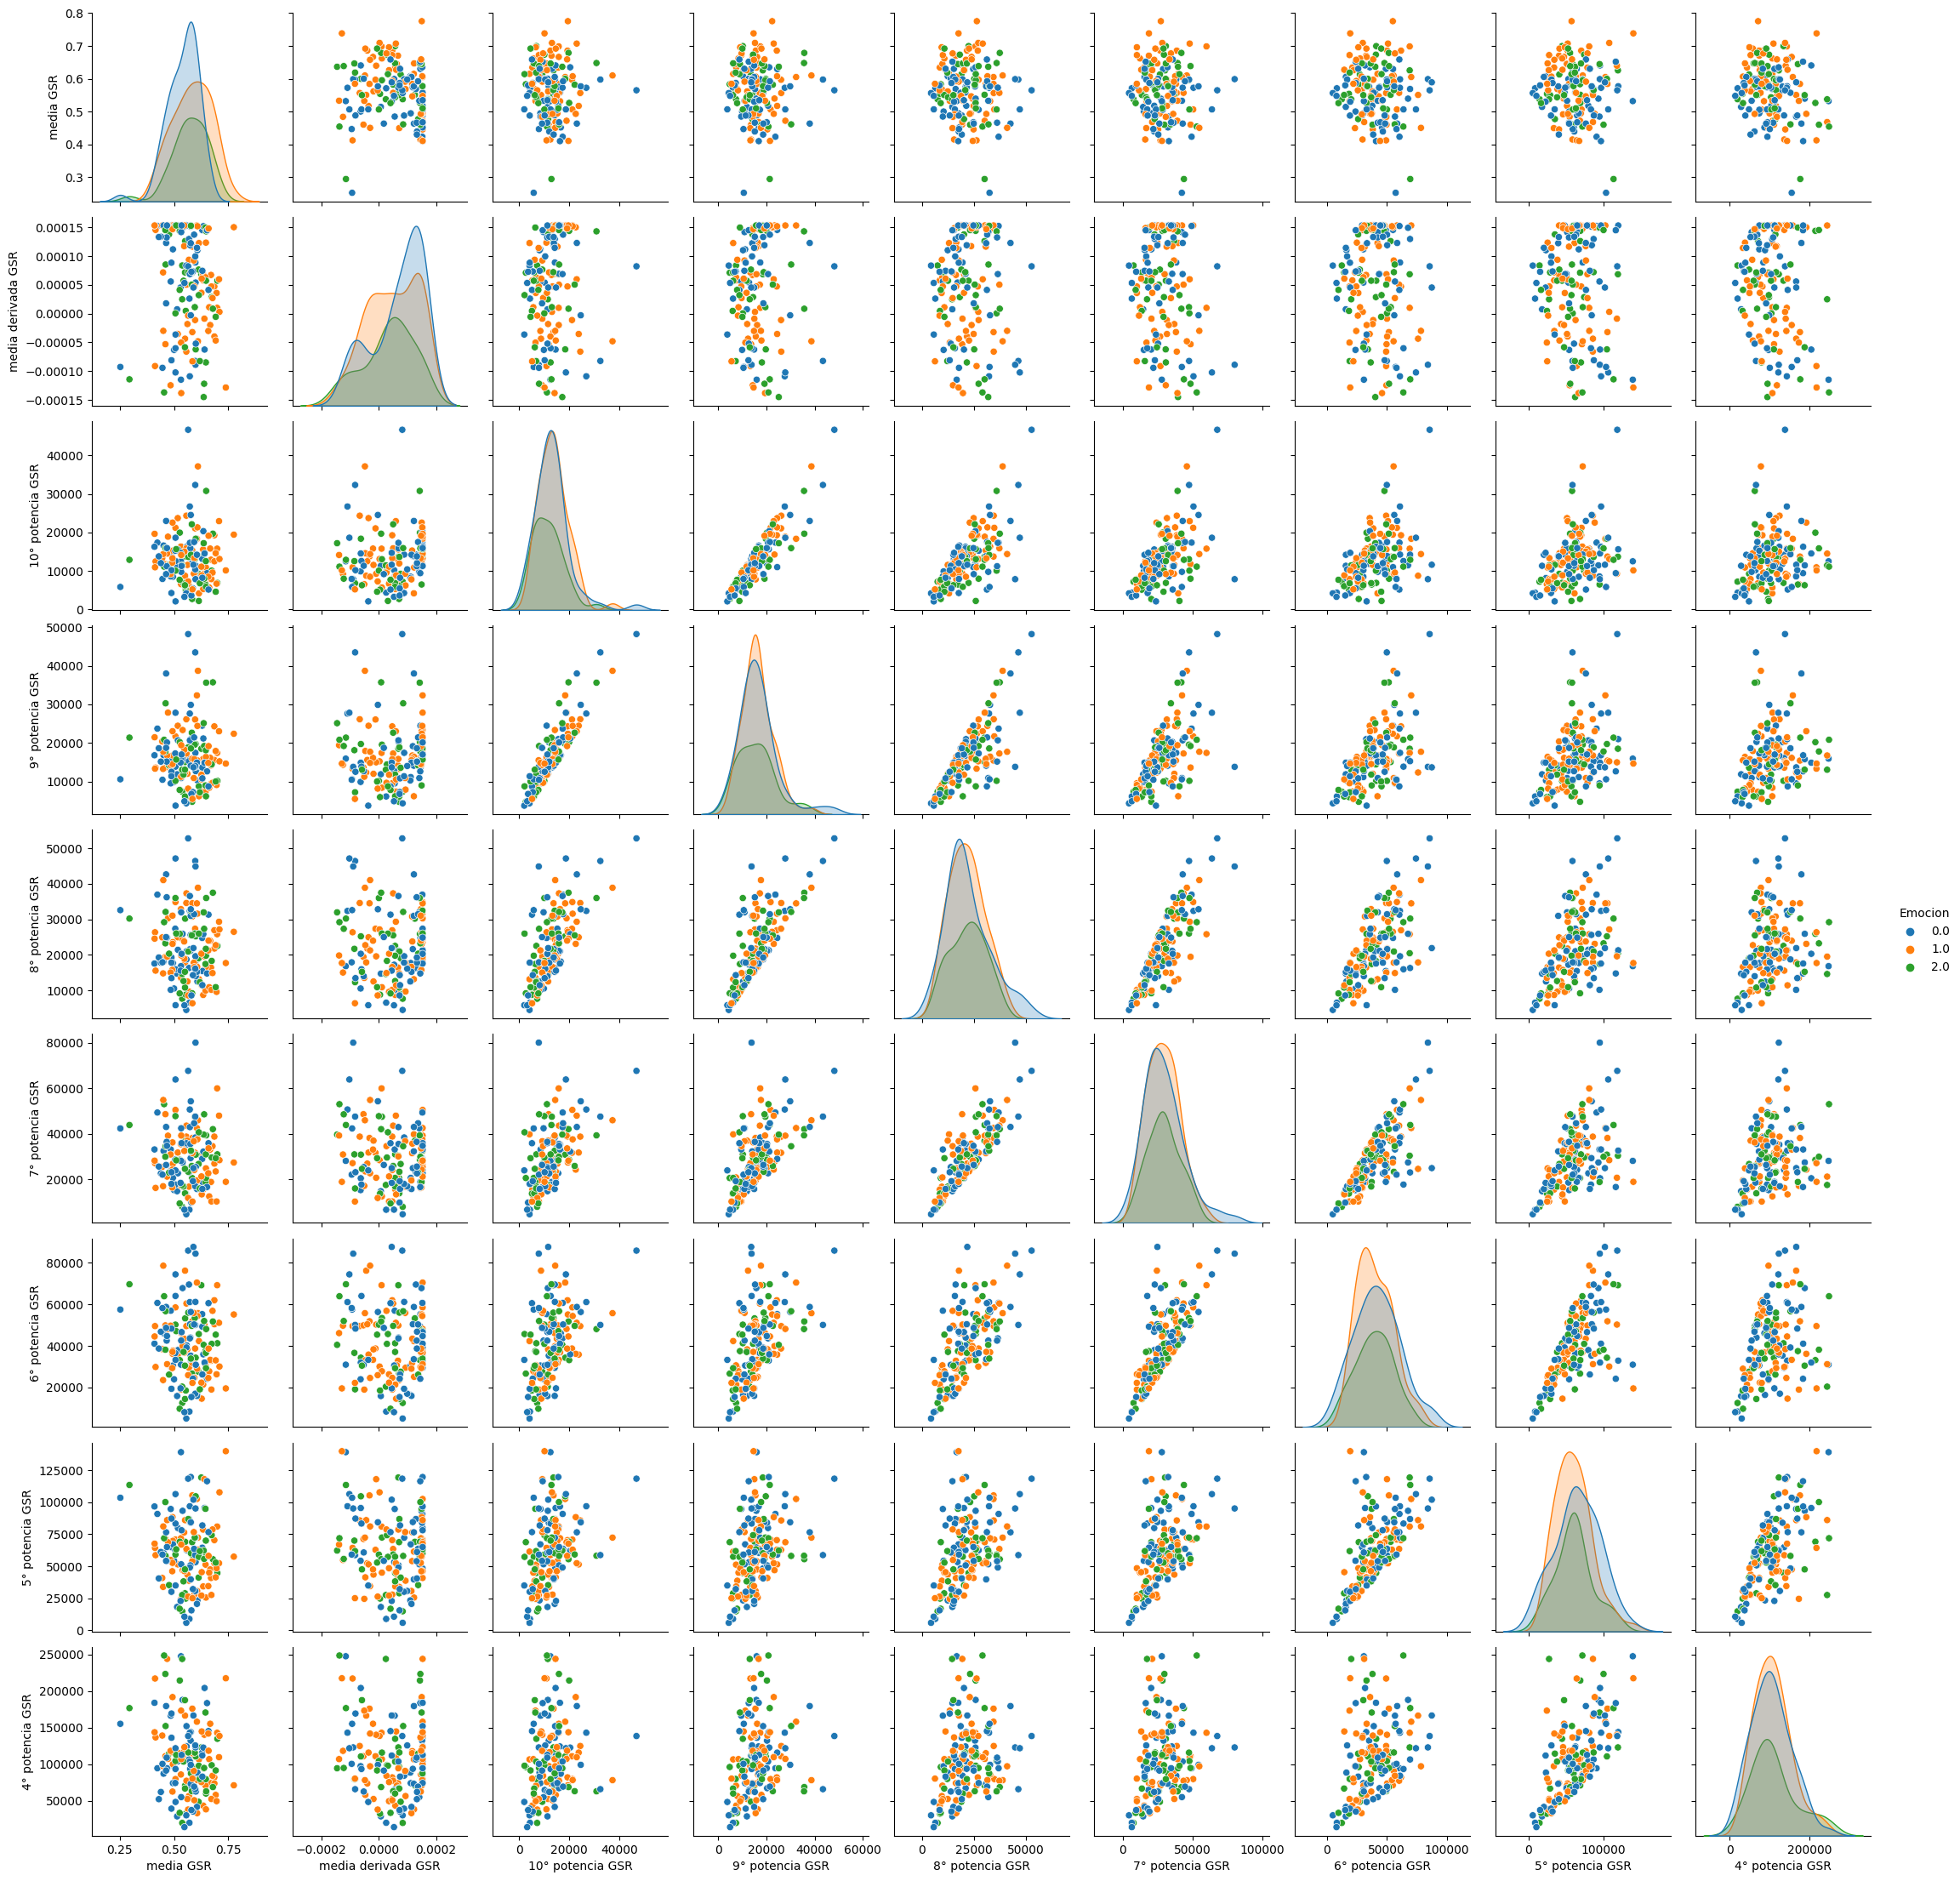

In [ ]:
sns.pairplot(df1, hue='Emocion', palette='tab10')

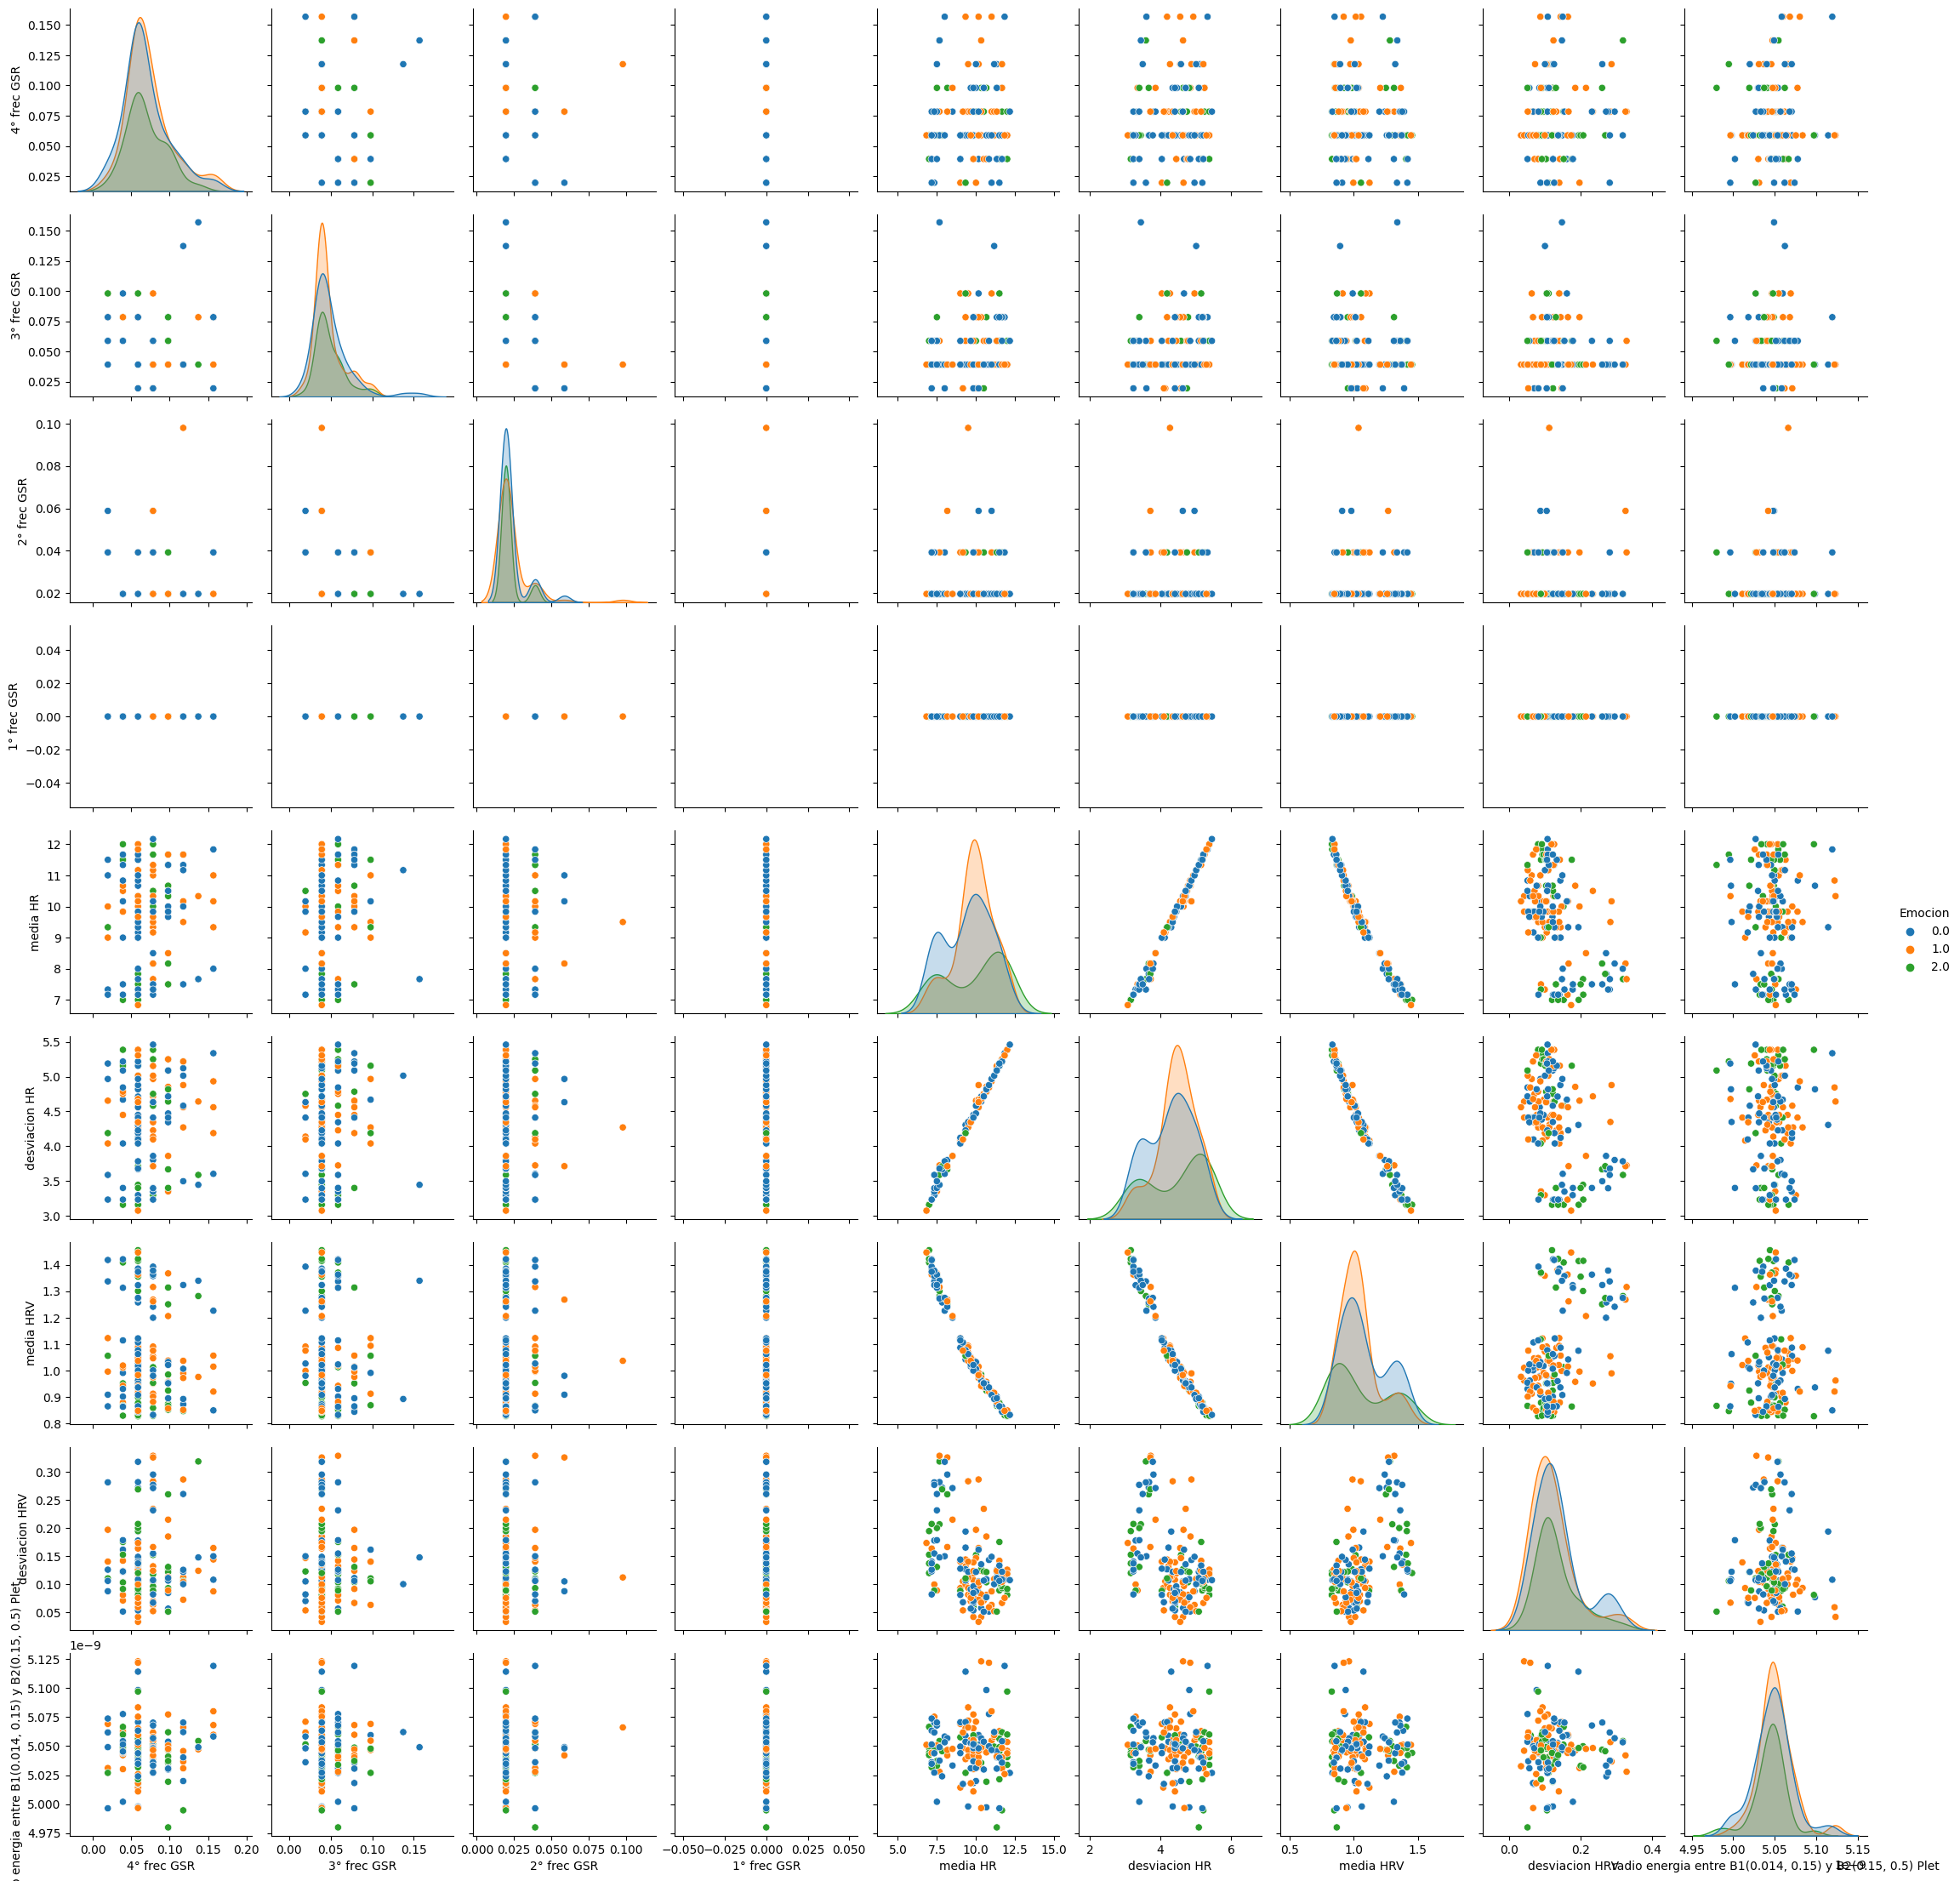

In [ ]:
sns.pairplot(df3, hue='Emocion', palette='tab10')

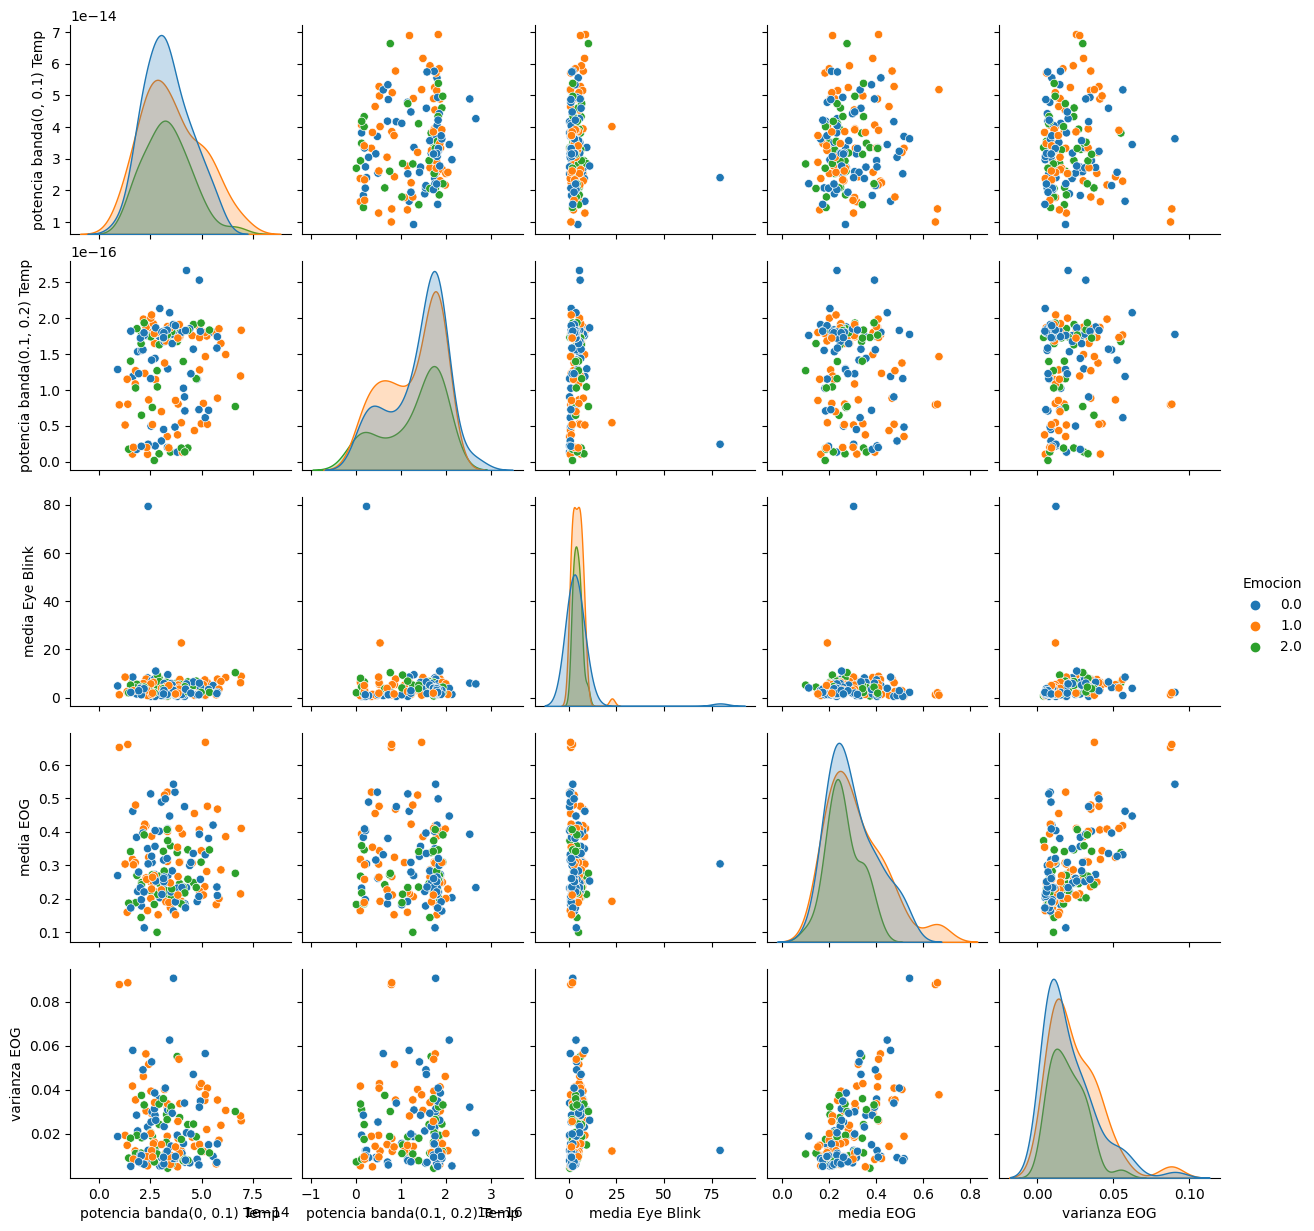

In [ ]:
sns.pairplot(df7, hue='Emocion', palette='tab10')

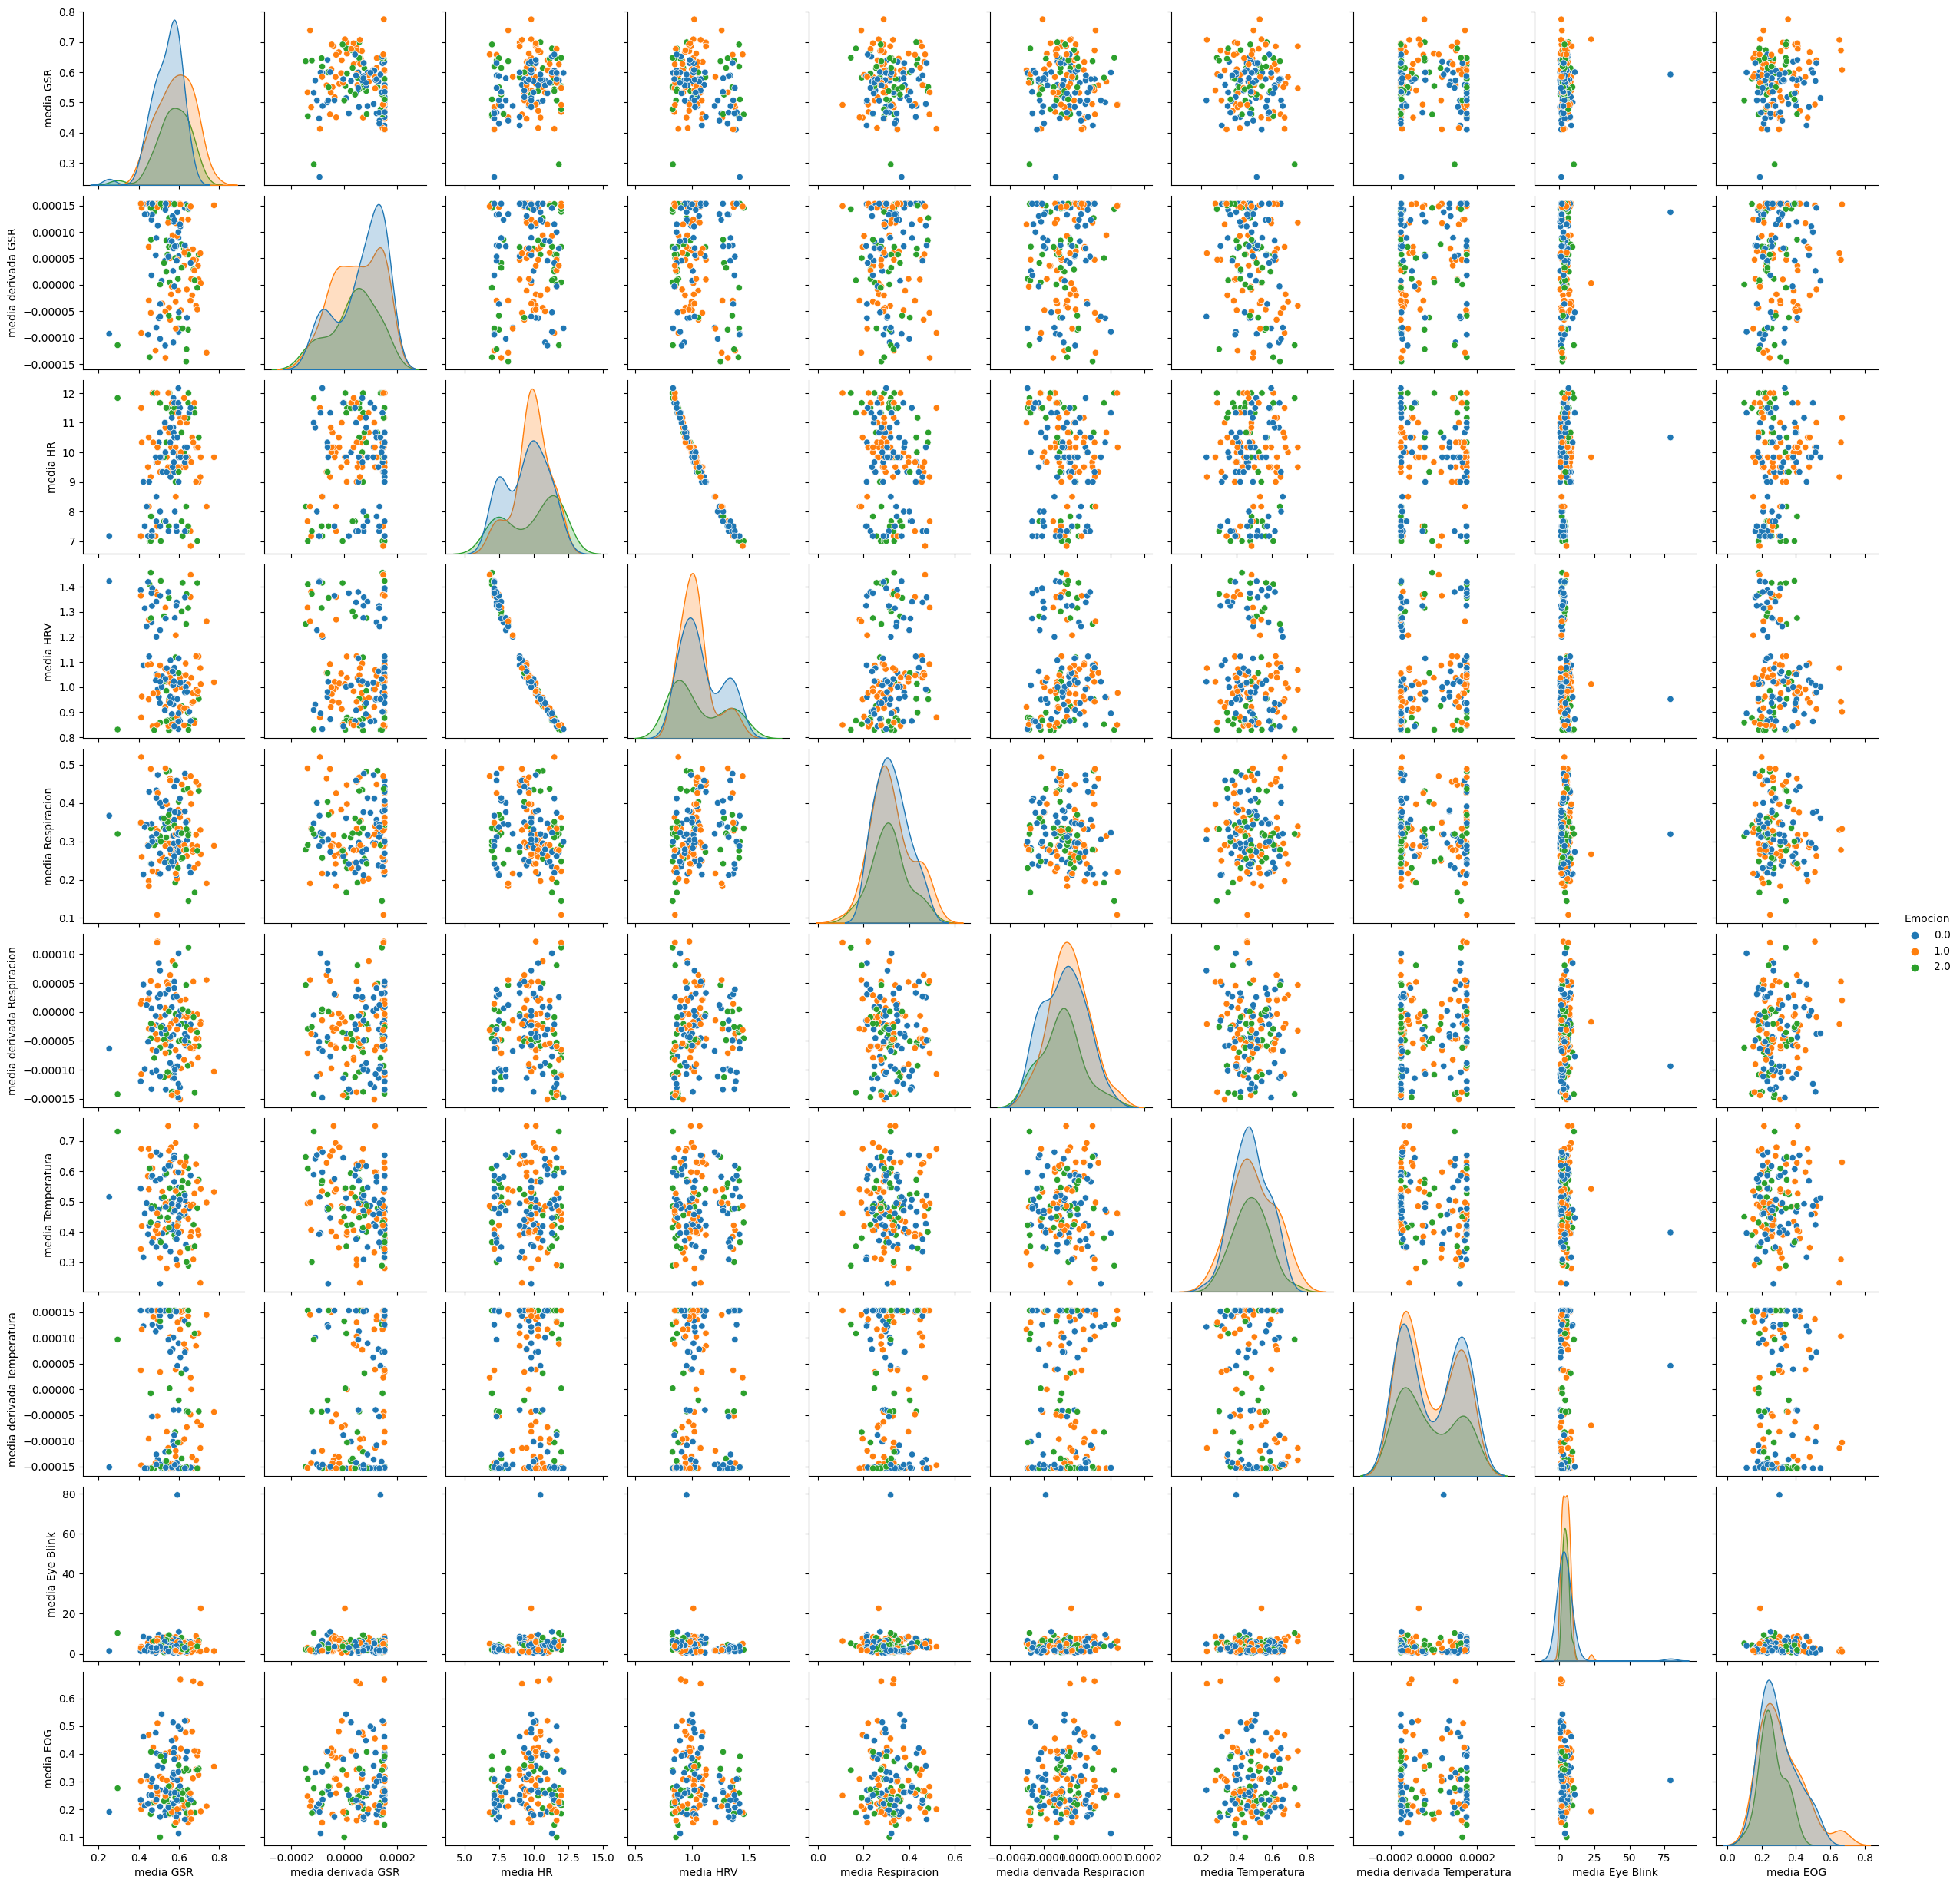

In [ ]:
df8 = df.loc[: , ['media GSR','media derivada GSR', 'media HR', 'media HRV', 'media Respiracion','media derivada Respiracion', 'media Temperatura', 'media derivada Temperatura',
              'media Eye Blink', 'media EOG', 'Emocion']]
sns.pairplot(df8, hue='Emocion', palette='tab10')   # Se comparan las medias de todas las señales

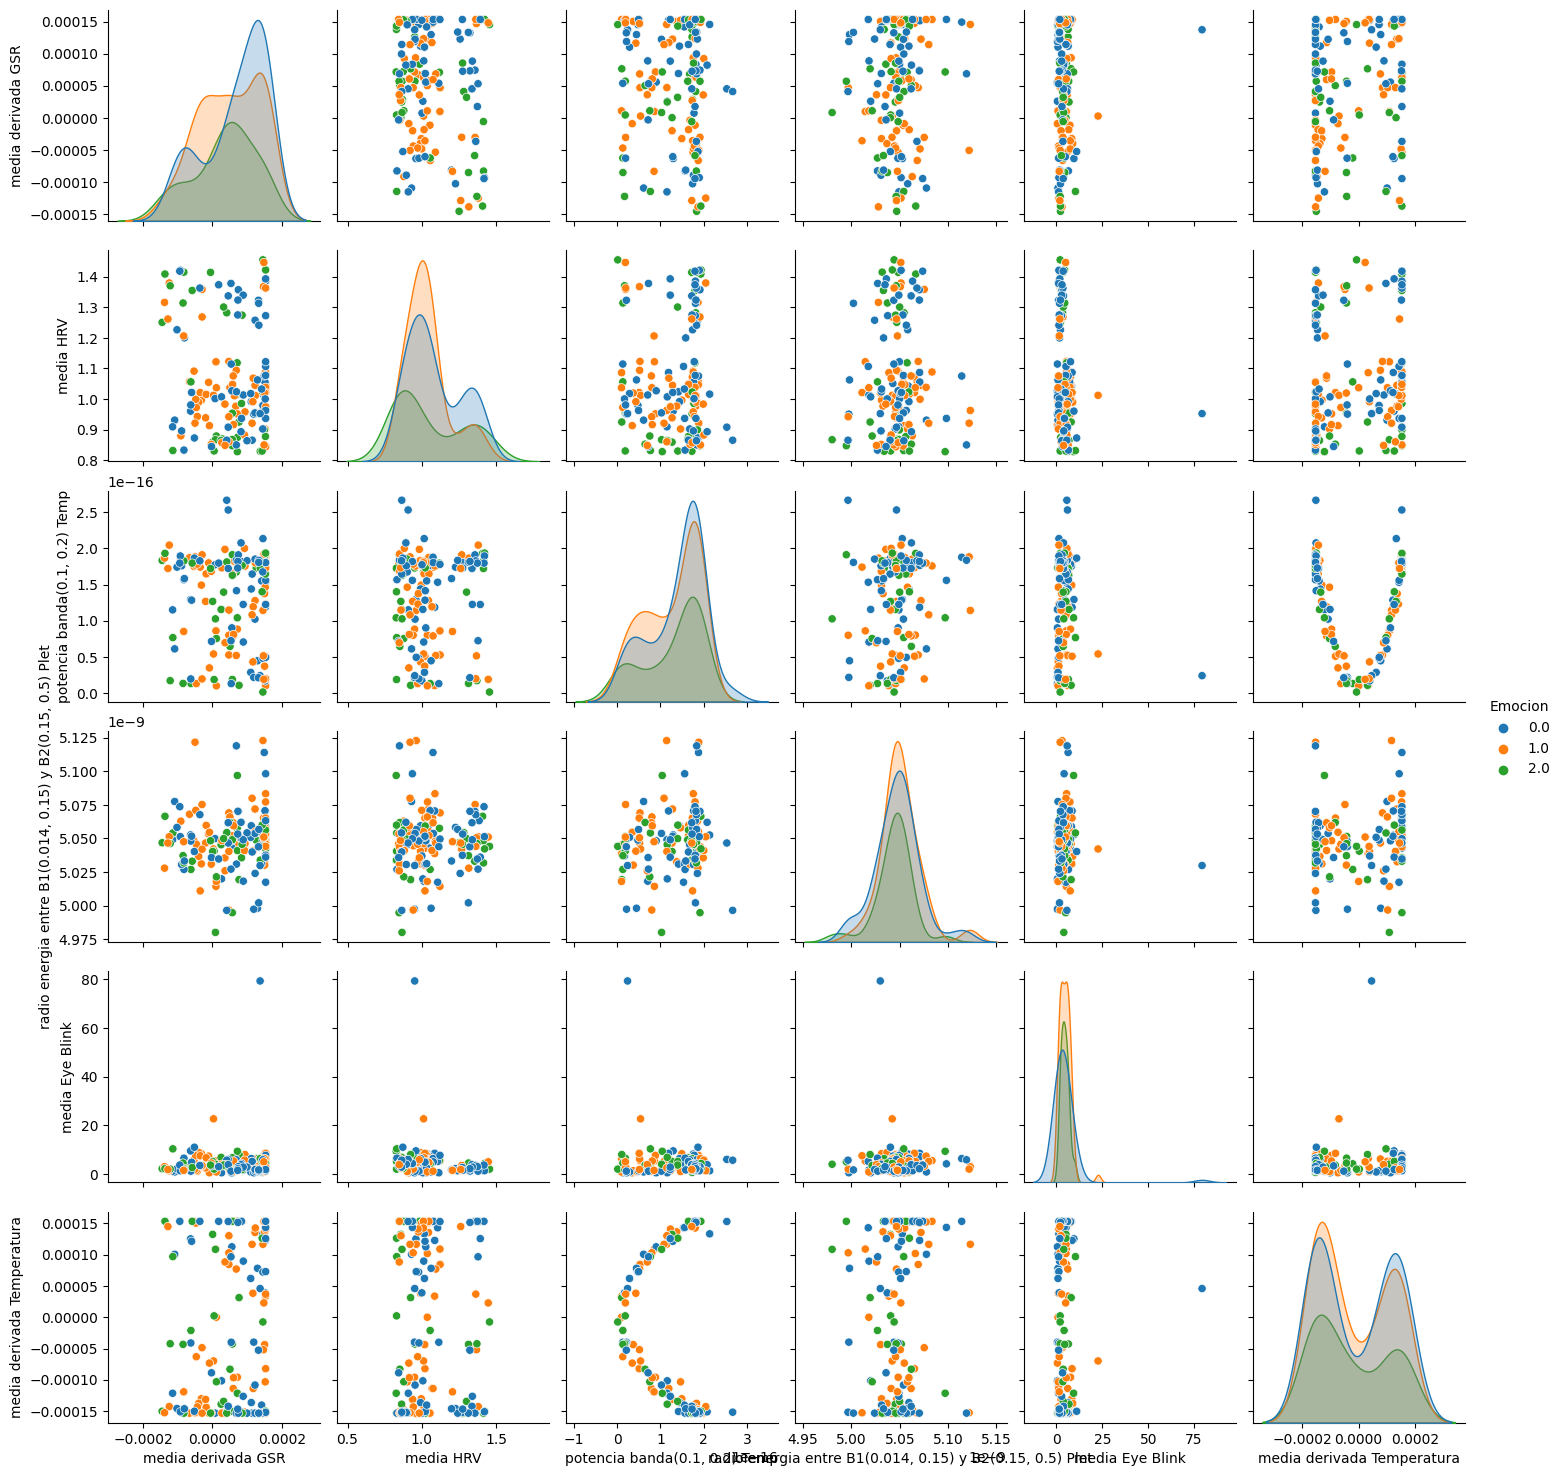

In [ ]:
df9 = df.loc[: , ['media derivada GSR', 'media HRV', 'potencia banda(0.1, 0.2) Temp', 'radio energia entre B1(0.014, 0.15) y B2(0.15, 0.5) Plet', 'media Eye Blink',
                  'media derivada Temperatura', 'Emocion']]
sns.pairplot(df9, hue='Emocion', palette='tab10')   # Se comparan las distribuciones que mas se alejan (visualmente)

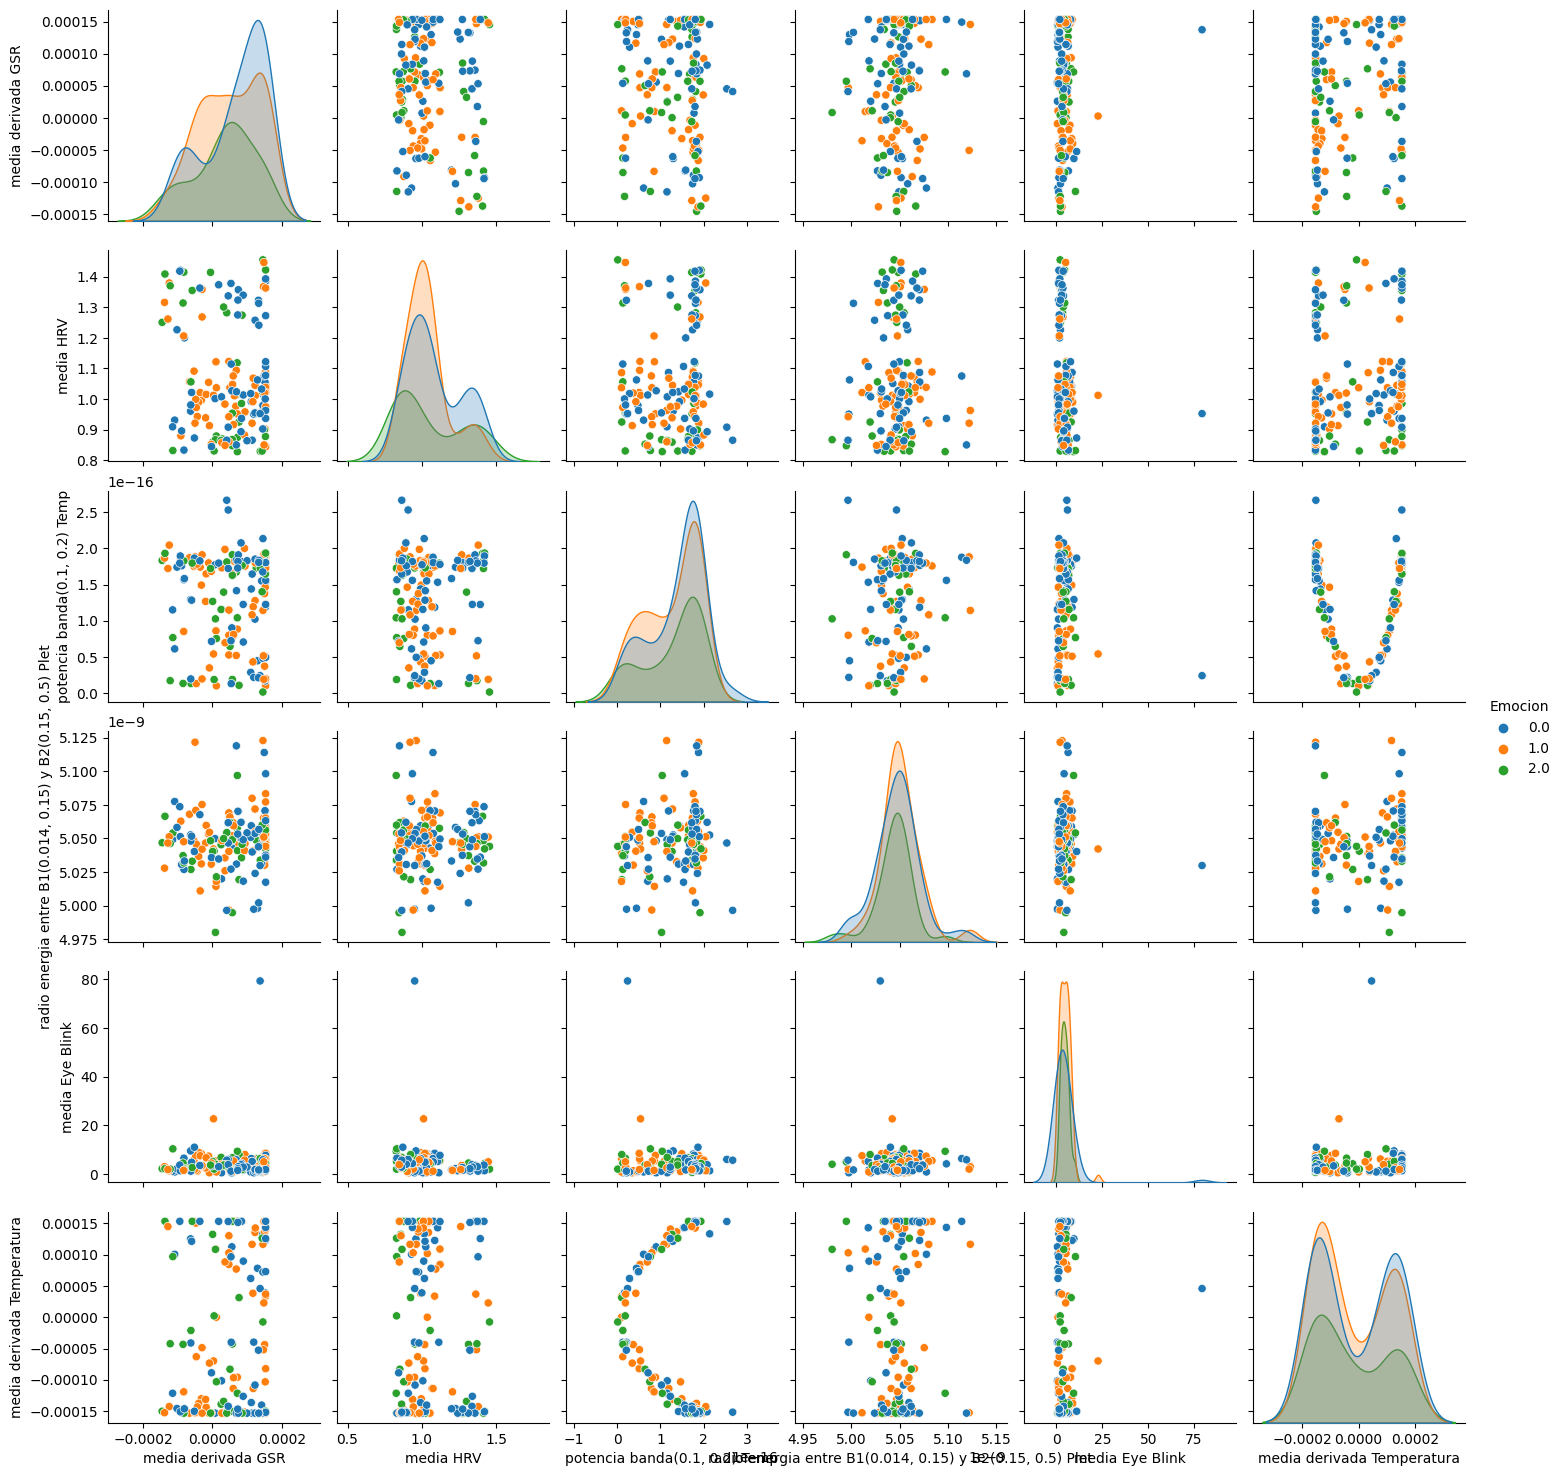

In [ ]:
df9 = df.loc[: , ['media derivada GSR', 'media HRV', 'potencia banda(0.1, 0.2) Temp', 'radio energia entre B1(0.014, 0.15) y B2(0.15, 0.5) Plet', 'media Eye Blink',
                  'media derivada Temperatura', 'Emocion']]
sns.pairplot(df9, hue='Emocion', palette='tab10')   # Se comparan las distribuciones que mas se alejan (visualmente)

##Pairplot:

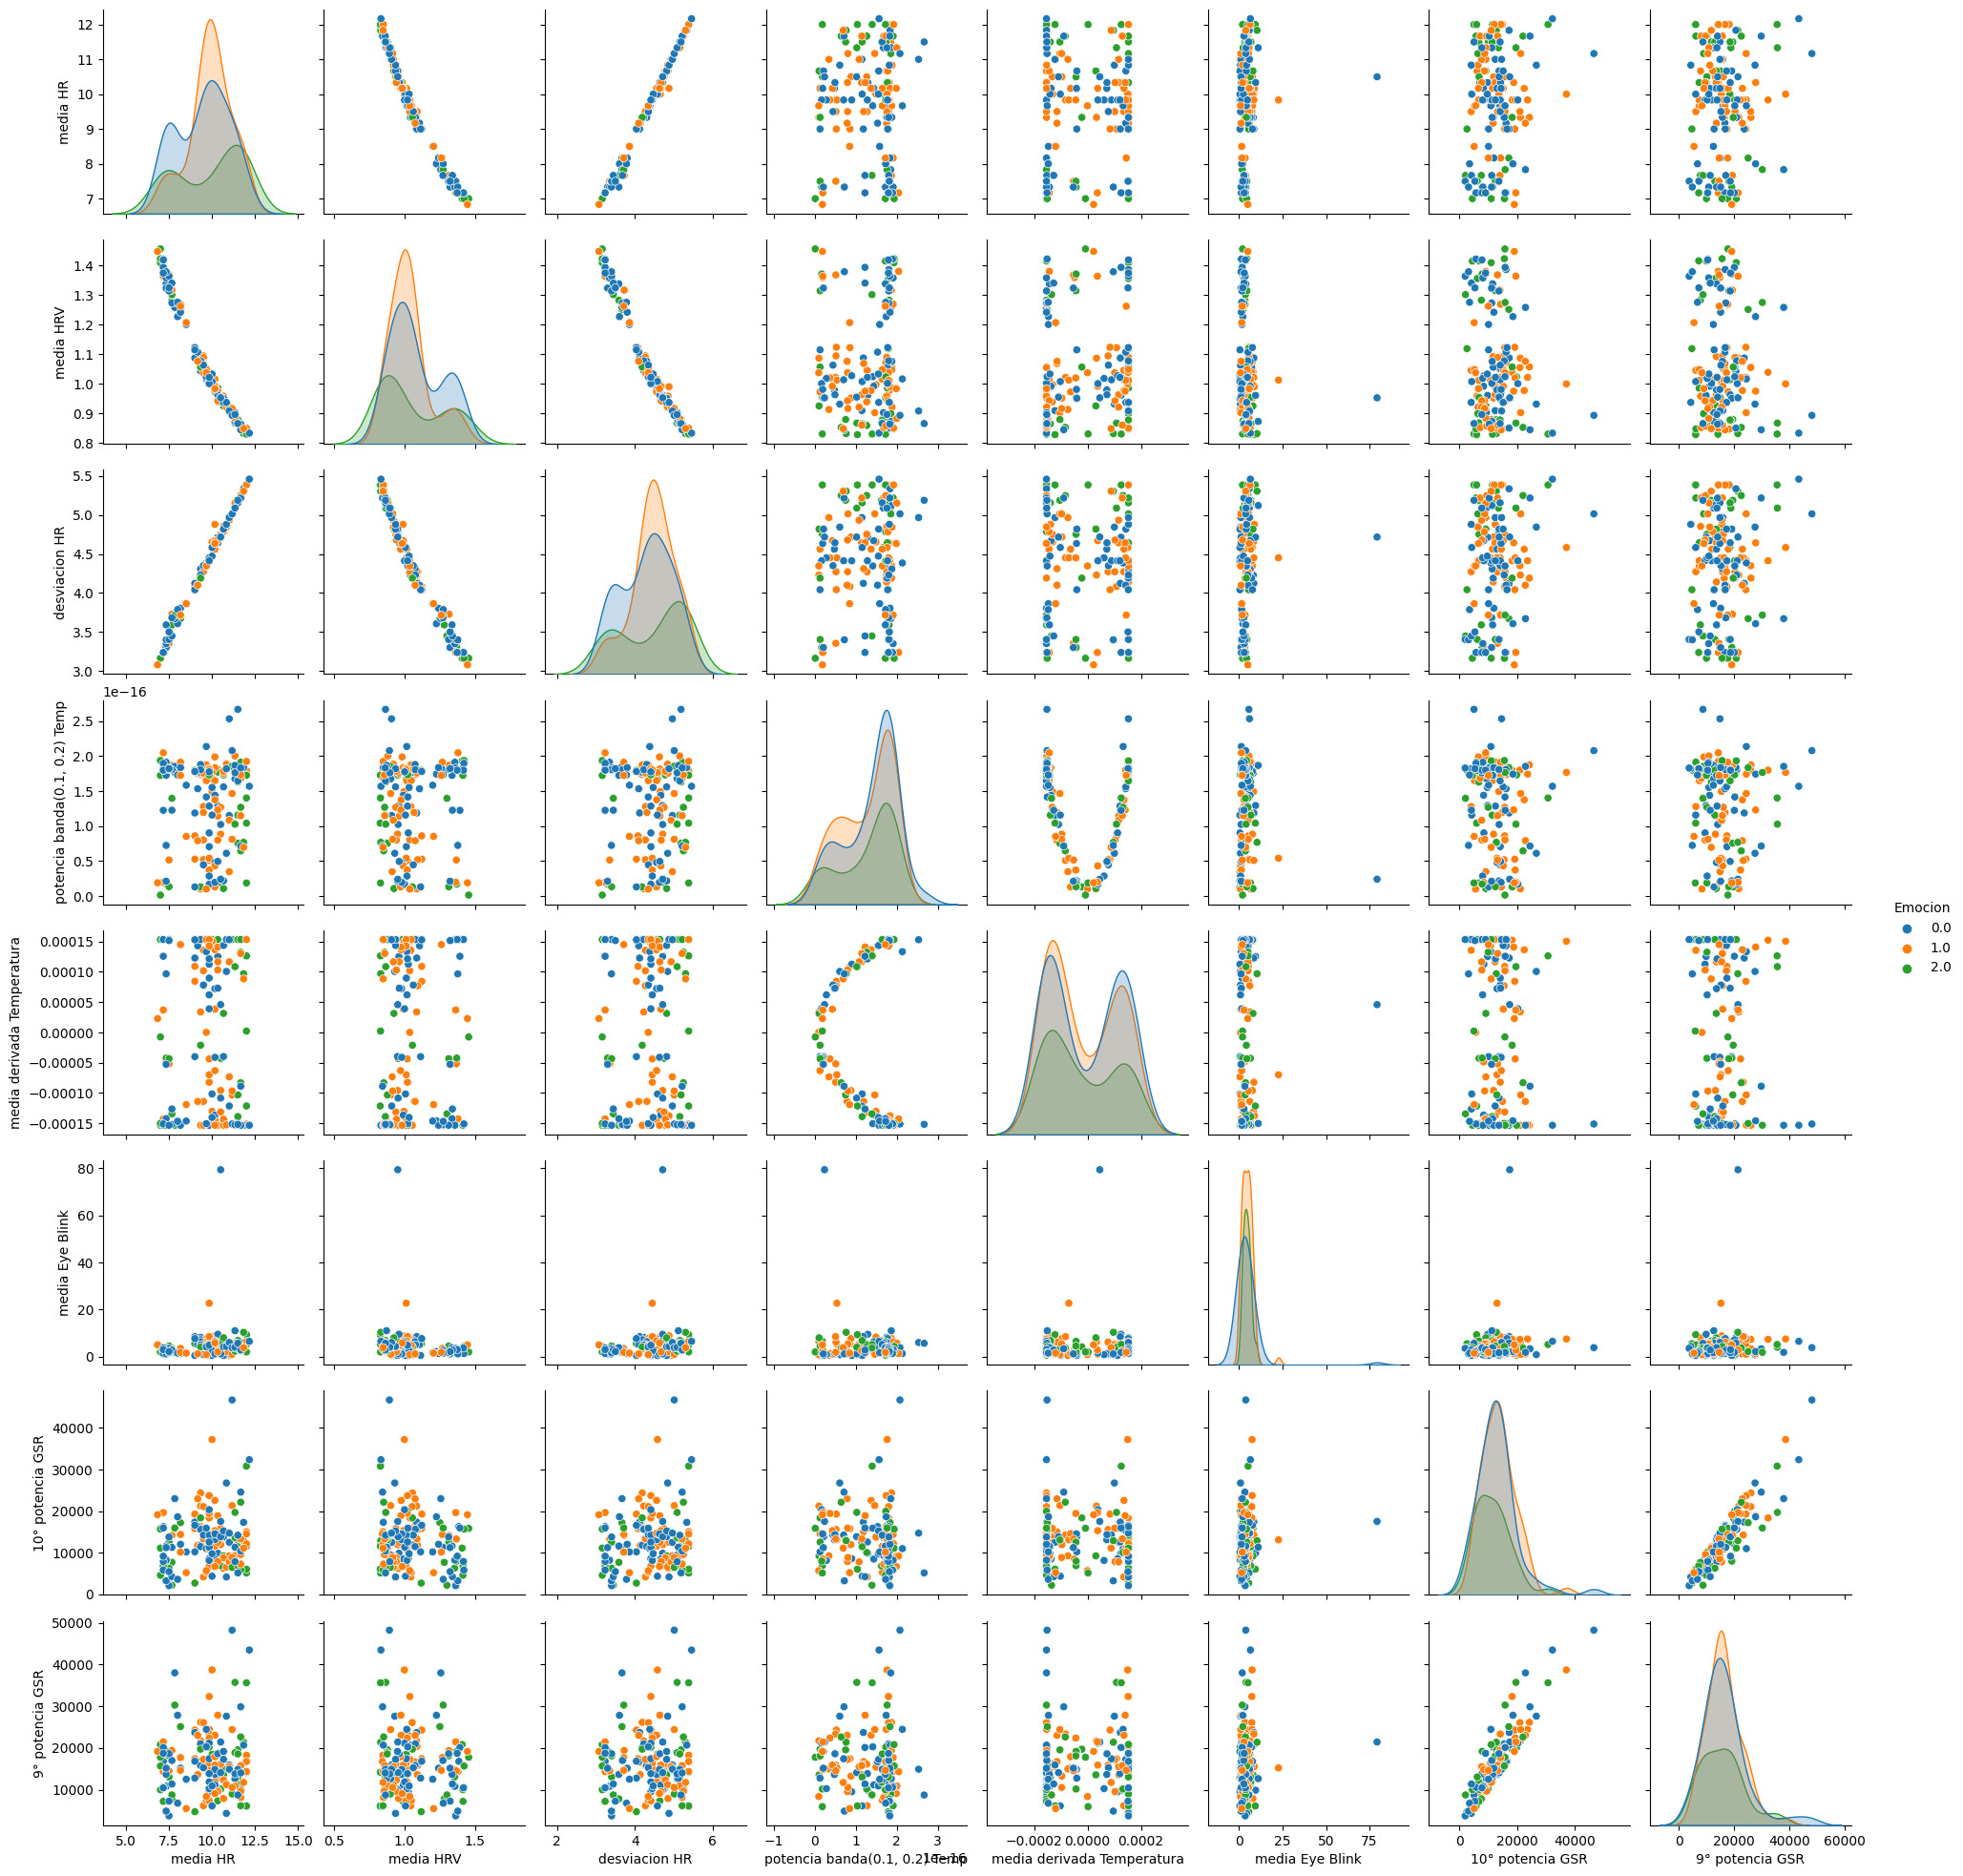

In [ ]:
df = df.loc[: , ['media HR', 'media HRV', 'desviacion HR', 'potencia banda(0.1, 0.2) Temp',  'media derivada Temperatura' ,'media Eye Blink','10° potencia GSR','9° potencia GSR', 'Emocion']]
sns.pairplot(df, hue='Emocion', palette='tab10')
plt.show()

##Análisis:

Tras realizar varias pruebas en las diferentes señales a graficar en el pairplot,se tomaron los siguientes análisis:

Realizando el análisis de las gráficas que se encuentran sobre la diagonal principal del pairplot, se nota como algunas presentan dos picos de moda en lugar de uno, esto puede indicar la presencia de subgrupos dentro del conjunto de datos.
Se estudiaron 4 personas viendo 40 videos y siendo cada persona un subgrupo, es consecuente con la afirmación anterior, basándonos en las emociones experimentadas (positiva, negativa, neutra) se podría afirmar que algunas sintieron emociones con una intensidad y frecuencia significativamente mayor a otros.

De la gráfica de comparación entre la media HRV y la HR se tiene una correlación negativa, eso se puede evidencia en la forma diagonal descendente. Con esto se puede se puede afirmar que cuando una variable aumenta, la otra tiende a disminuir. Además realizando un análisis de las emociones se nota que las asociadas a la emoción positiva se encuentran a una baja frecuencia cardiaca, mientras que las neutras y principalmente las negativas se encuentran en altos valores de HR.

Para la media eye blink y cualquiera de las otras señales se muestra una línea vertical, esto indica que una de las variables se mantiene constante (eye blink) mientras la otra componente si varia. No se nota ninguna relación entre la emoción y la media del parpadeo.

Se ve una diagonal ascendente entre media HR con desviación HR, dando así una correlación positiva, la media de HR aumenta, es más probable que la desviación estándar de HR también aumente. Esto podría indicar que, en promedio, a medida que la frecuencia cardíaca aumenta, también se vuelva más variable en su ritmo. En cuanto a las emociones, es importante destacar los pocos relacionados a la emoción positiva en esta gráfica.

Existe una correlación positiva entre la novena y décima potencia espectral en la señal de respuesta galvánica de la piel (GSR) en la banda de frecuencia [0-2.4] Hz esto indica que cuando aumenta la energía en la novena frecuencia más baja, también aumenta en la décima frecuencia dentro de la misma banda de frecuencia. La GSR es una medida fisiológica que se usa para capturar la respuesta del sistema nervioso autónomo ante estímulos emocionales. Un aumento en la actividad de GSR suele asociarse con respuestas emocionales, como el aumento de la ansiedad o el estrés. La relación positiva entre la novena y décima potencia espectral podría reflejar cómo varía la actividad en estas frecuencias en respuesta a diferentes estados emocionales.

Al analizar la gráfica del espectro de potencial de la temperatura en la banda de frecuencia (0.1,0.2) Hz y la media de la temperatura, se nota que forman una parábola. El espectro de potencial en esta banda específica de frecuencia proporciona información sobre cómo varía la energía de los cambios de temperatura en ese rango. Por otro lado, la media de la temperatura representa el promedio de la temperatura en el conjunto de datos. La relación no lineal entre estas dos señales sugiere que los cambios en la media de la temperatura no están directamente relacionados de manera proporcional con los cambios en la energía en la banda de frecuencia (0.1,0.2) Hz. Esta relación sugiere que las respuestas emocionales pueden no seguir una relación lineal simple con los cambios en la temperatura corporal.


##Conclusiones:


Mediante la extracción de características del estudio DEAP  se puede concluir que las respuestas emocionales humanas son altamente diversas y complejas. Los patrones observados en las gráficas sugieren que las emociones no pueden reducirse a una única respuesta fisiológica o un conjunto de variables,las respuestas emocionales varían entre individuos y emociones.

Se logró identificar correlaciones entre algunas variables fisiológicas y las emociones. Destacamos la correlación inversa entre la media de la variabilidad de la frecuencia cardíaca (HRV) y la frecuencia cardíaca (HR), lo que sugiere que la variabilidad cardíaca tiende a disminuir a medida que aumenta la frecuencia cardíaca. Además, se observa que las emociones positivas están asociadas con frecuencias cardíacas más bajas, mientras que las emociones negativas y neutras se relacionan con frecuencias cardíacas más elevadas.

Algunas variables fisiológicas, como la respuesta galvánica de la piel (GSR), muestran correlaciones entre los componentes de su potencia espectral, lo que sugiere que diferentes frecuencias podrían estar vinculadas con diversos estados emocionales. Esto muestra la lo complejas que pueden ser de las respuestas corporales a diferentes estímulos emocionales.

Además, se identificó una relación no lineal entre el espectro de potencia de la temperatura en una banda de frecuencia específica y la media de la temperatura corporal resalta la complejidad de la conexión entre la temperatura corporal y las respuestas emocionales. Esto sugiere que las respuestas emocionales pueden no seguir una relación lineal y simple con las variables fisiológicas.

Sin embargo, no todas las características corporales parecen tener una relación directa con las emociones. La falta de correlación evidente entre la media del parpadeo (eye blink) y otras señales sugiere que esta variable permanece constante independientemente de las emociones experimentadas. Esto plantea la posibilidad de que algunas variables no estén influenciadas por el estado emocional.
